In [44]:
import pandas as pd
colours = pd.read_pickle('tmp/extracted_colors.pkl').reset_index()
colours

,index,count,value
0,17,1035261,"[0.8470588949527849, 0.886274574714946, 0.9215..."
1,20,162447,"[0.9240002515067238, 0.7551961546367674, 0.291..."
2,5,140222,"[0.3016762372726491, 0.32894595212036565, 0.35..."
3,18,98011,"[0.8471522780460341, 0.8859076037779491, 0.920..."
4,22,84161,"[0.9851600221802045, 0.9638881985400695, 0.924..."
5,2,69823,"[0.24430341323214816, 0.4619198292733792, 0.69..."
6,3,65428,"[0.26416355266212577, 0.45271751419362444, 0.4..."
7,10,60473,"[0.5507034931012769, 0.1614994559918555, 0.227..."
8,6,60292,"[0.33876428027175054, 0.6510936426779738, 0.85..."
9,9,42271,"[0.4297872808633063, 0.4508847711030272, 0.489..."


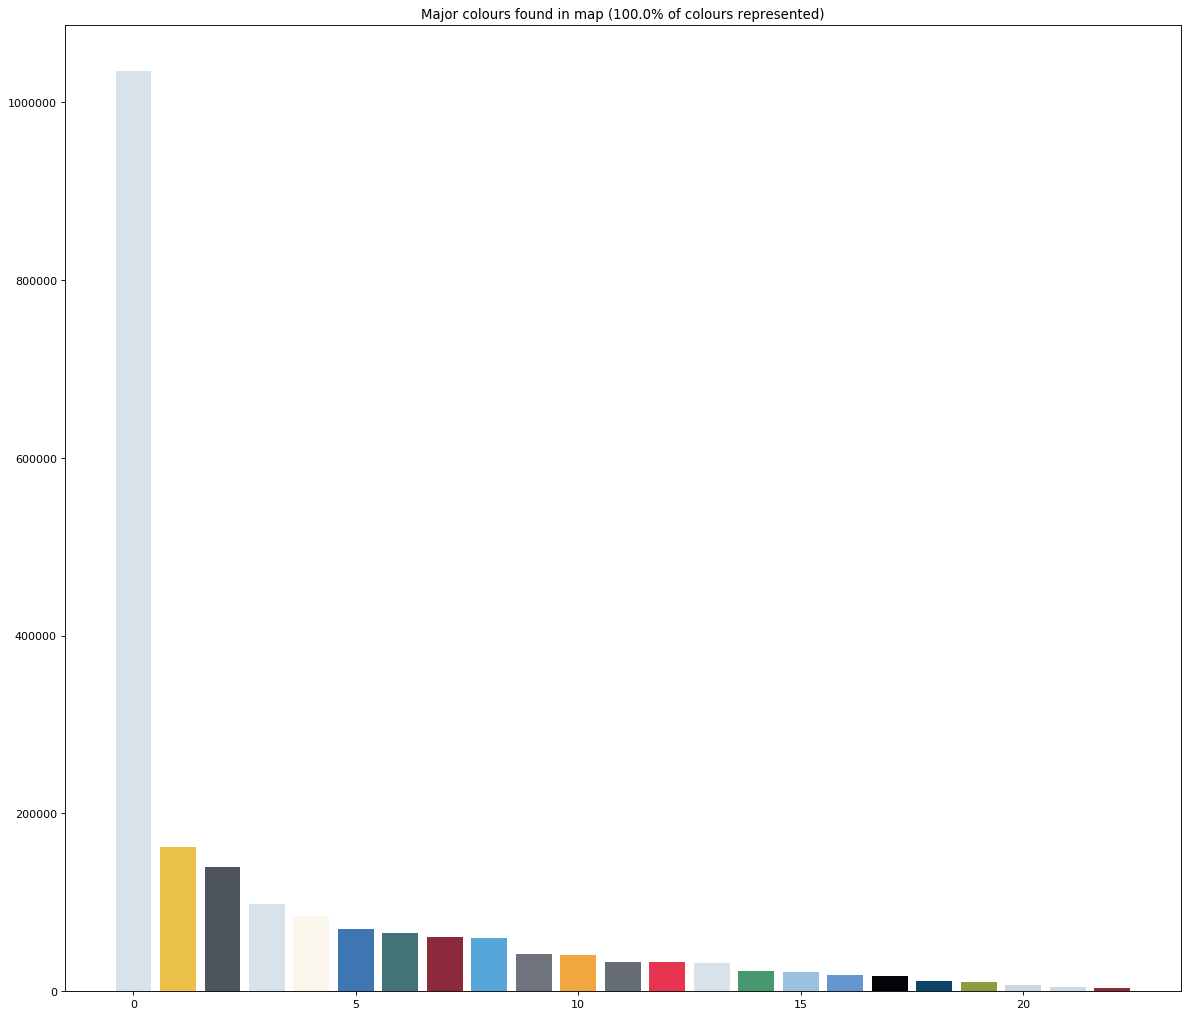

In [45]:
import matplotlib.pyplot as plt
import numpy as np
def print_colors(extracted_colors):
    toplot = extracted_colors[:25]
    percentage = 100 * len(toplot)/len(extracted_colors)
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.bar(np.arange(len(toplot)) , toplot['count'].values , color=toplot['value'].values)
    plt.title('Major colours found in map ('+str(percentage)+'% of colours represented)')
    plt.show()
print_colors(colours)

[[ 89.38787492  -1.63848358  -5.53008913]
 [ 79.73972545   3.19927413  62.95561416]
 [ 35.28884343  -1.20246236  -4.78970444]
 [ 89.36056582  -1.61918559  -5.46994254]
 [ 96.97582105   0.11286532   5.42968835]
 [ 48.41714787   0.80917471 -36.99081081]
 [ 45.4592578  -15.61224086  -6.46111853]
 [ 32.95825713  42.90675013  13.80151595]
 [ 65.23165454  -9.07056129 -33.67744849]
 [ 48.29031627   0.13874709  -6.17493697]
 [ 73.90129023  18.86683022  61.52624589]
 [ 45.37377183  -0.52467409  -5.23441115]
 [ 51.91515737  67.72877983  27.65229534]
 [ 89.38676225  -1.6435517   -5.53185677]
 [ 56.84172509 -34.78505706  14.46175488]
 [ 76.47717578  -5.38120689 -19.93269872]
 [ 60.87016667  -1.21223263 -33.16123646]
 [  1.12644772   0.11414096  -1.36110077]
 [ 26.9528014   -1.72466029 -27.2965816 ]
 [ 61.60429974 -18.77621961  45.37651666]
 [ 84.74672174   0.89896478  -7.40760587]
 [ 86.26486509  -2.87227553  -7.67434682]
 [ 33.33717709  42.94579972  15.62648233]]
[89.38787492 79.73972545 35.28884

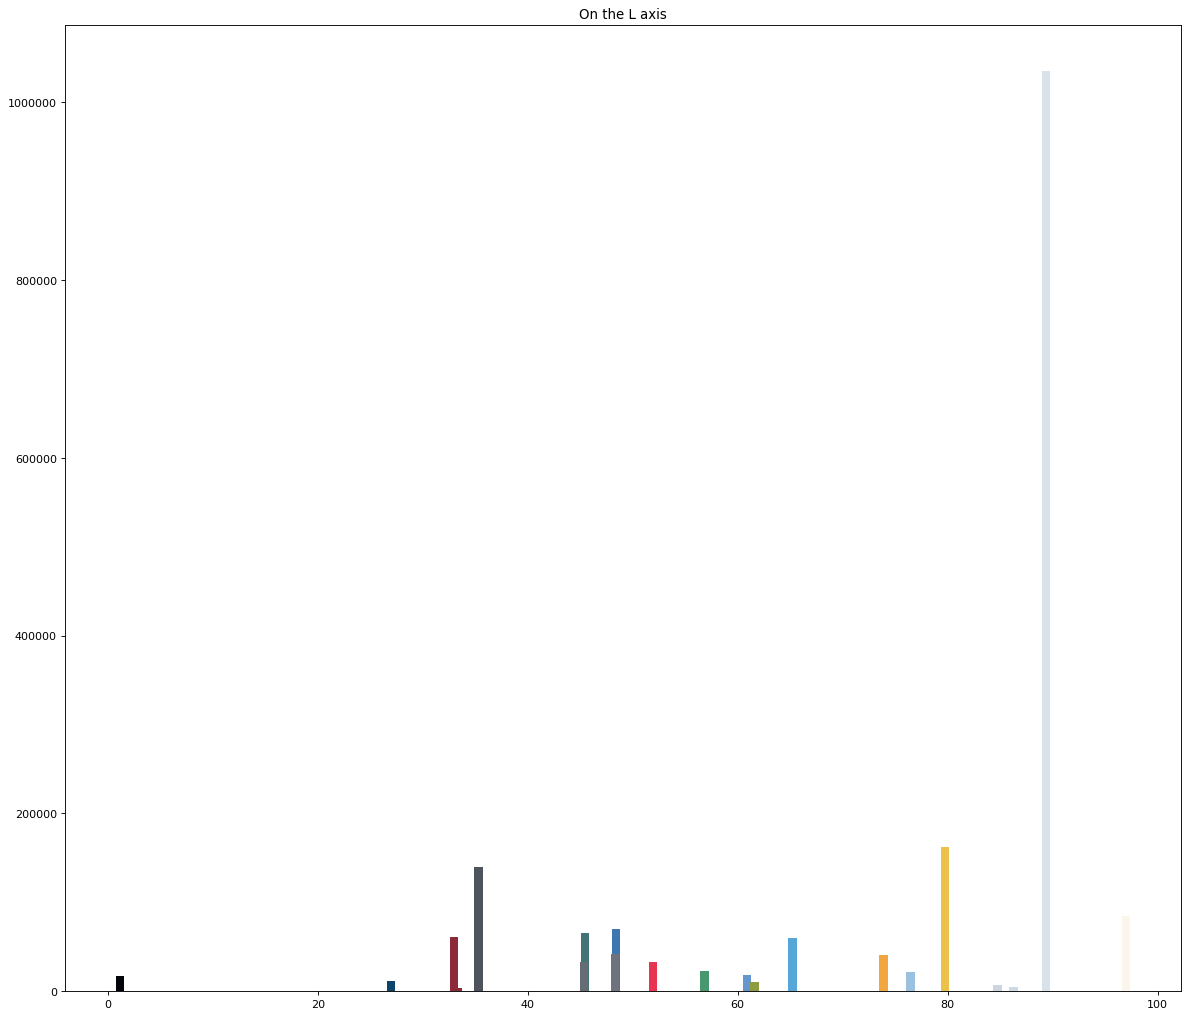

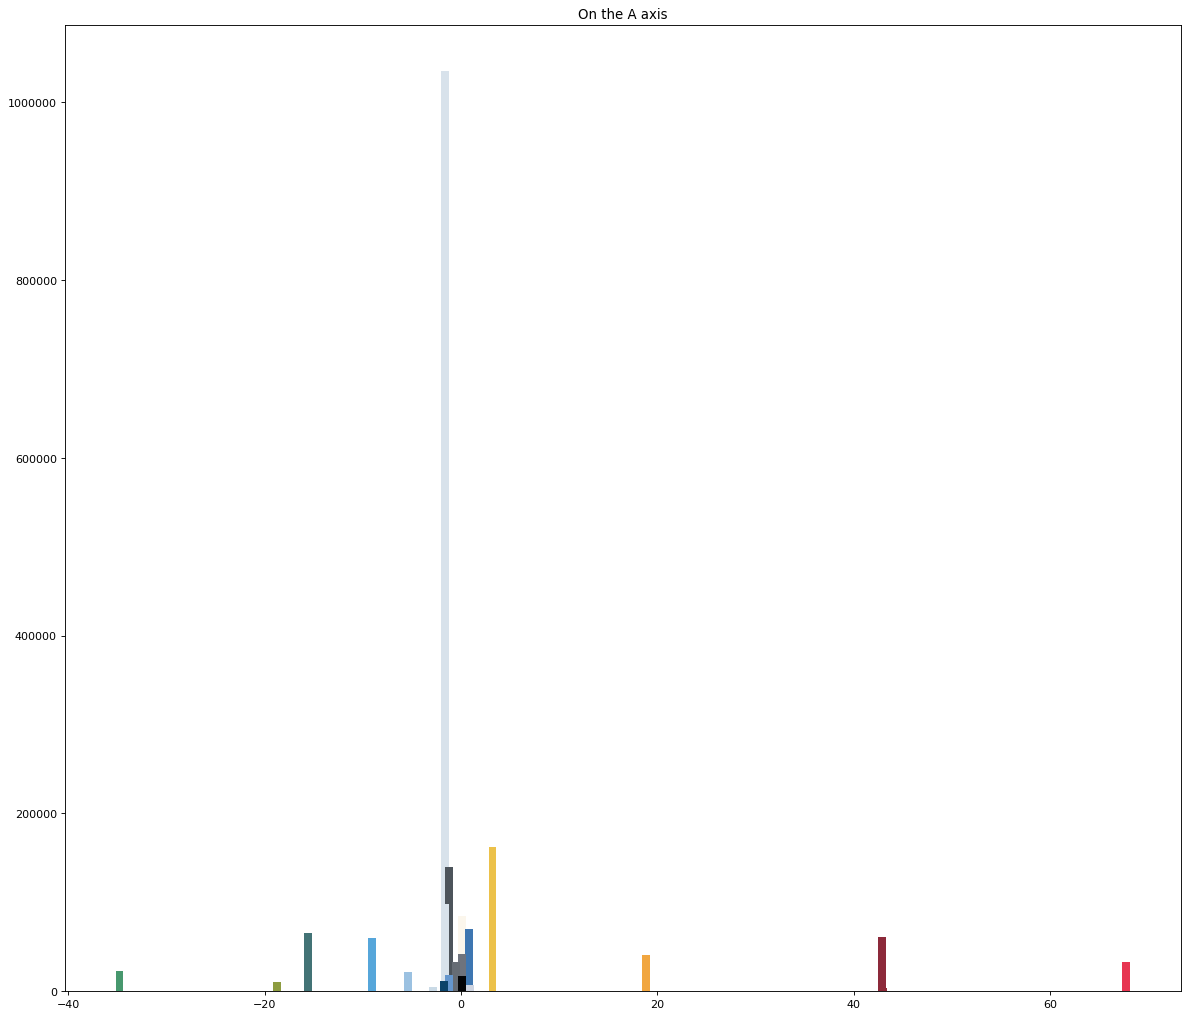

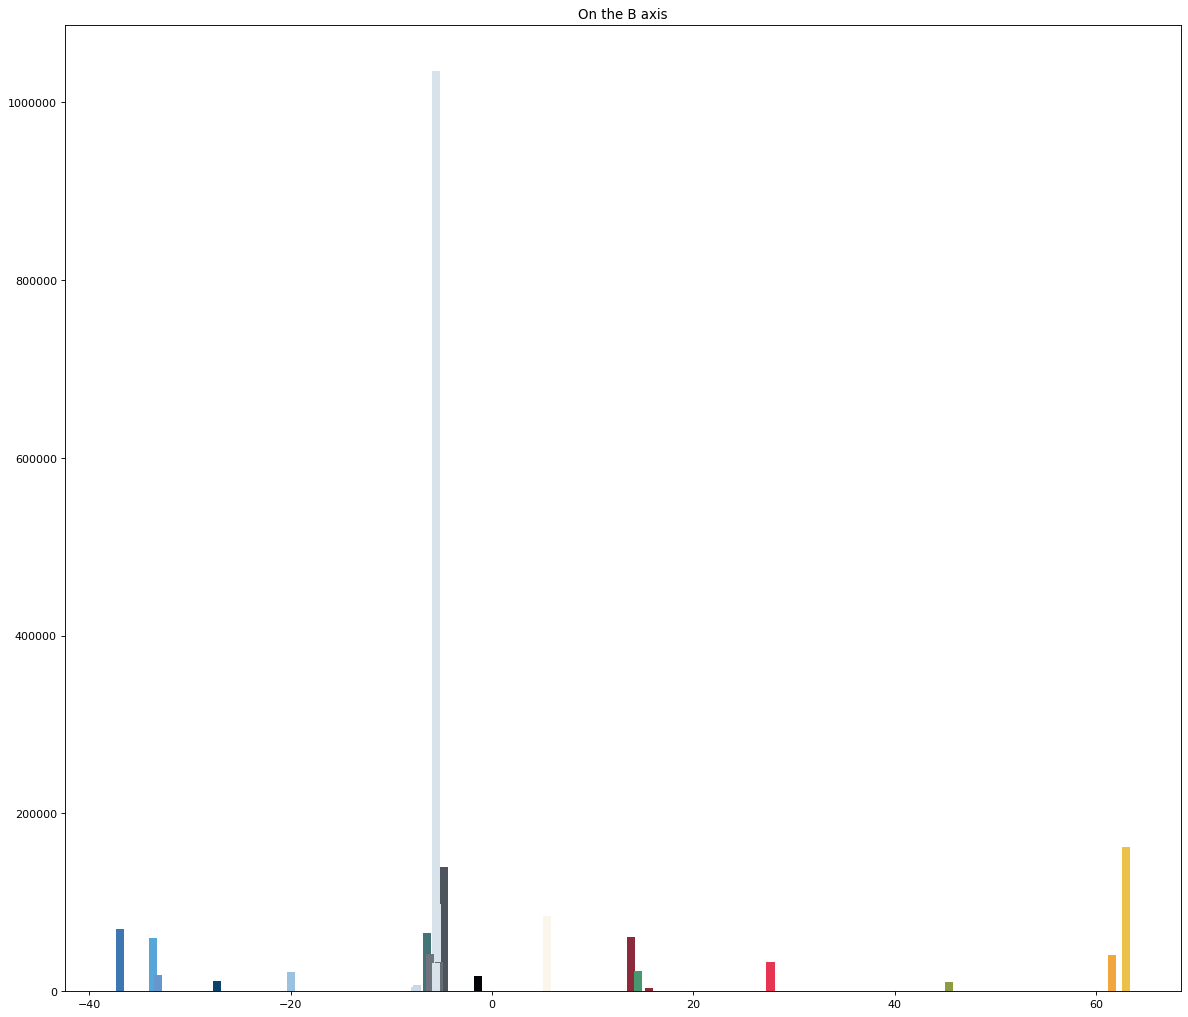

In [46]:
import skimage.color
rgb_rep = [list(col) for col in colours['value'].values]
labRep = skimage.color.rgb2lab([rgb_rep])[0]
print(labRep)
L = labRep[:, 0]
counts = colours['count'].values
print(L)
print(counts)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(labRep[:, 0] , counts , color=rgb_rep)
plt.title('On the L axis')
plt.show()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(labRep[:, 1] , counts , color=rgb_rep)
plt.title('On the A axis')
plt.show()

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(labRep[:, 2] , counts , color=rgb_rep)
plt.title('On the B axis')
plt.show()


<BarContainer object of 23 artists>

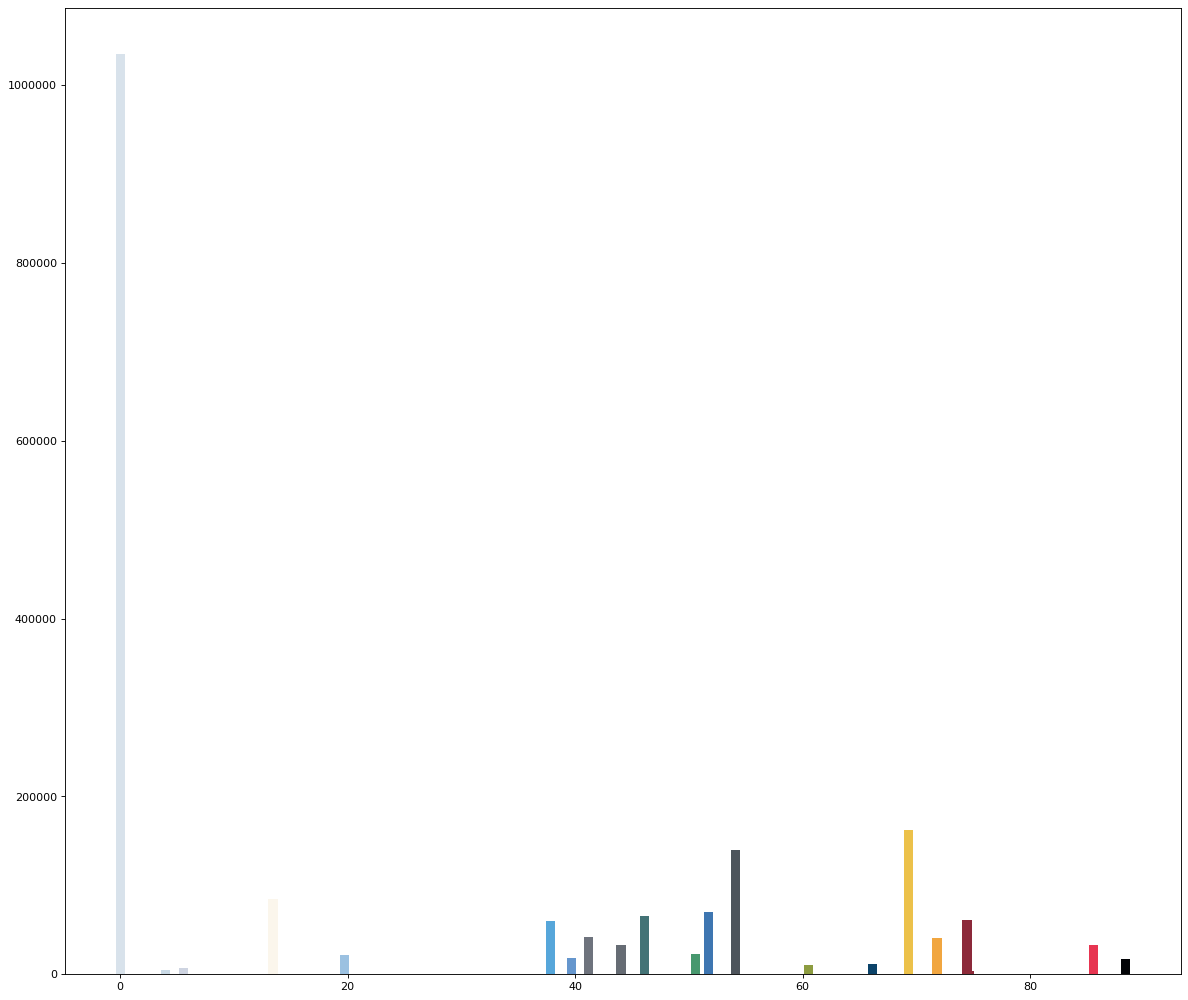

In [49]:
sea_colour_lab = labRep[0]
import math

def colour_distance(rgb1, rgb2):
    [[lab1, lab2]] = skimage.color.rgb2lab([[rgb1, rgb2]])
    return np.linalg.norm(lab1 - lab2)
distance_to_sea = [colour_distance(rgb_rep[0], rgb ) for rgb in rgb_rep]
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(distance_to_sea , counts , color=rgb_rep)

